In [2]:
import geopandas as gpd

In [3]:
SD_FNAME = 'nysd_20d/nysd.shp'
SD_FPATH = 'data/nysd_20d.zip'
SD_ZIP_PATH = 'zip://' + SD_FPATH + '!' + SD_FNAME

B_FNAME = 'nybbwi_20d/nybbwi.shp'
B_FPATH = 'data/nybbwi_20d.zip'
B_ZIP_PATH = 'zip://' + B_FPATH + '!' + B_FNAME

SD_ZIP_PATH

'zip://data/nysd_20d.zip!nysd_20d/nysd.shp'

In [4]:
FS = (10, 10)

In [5]:
nyd = gpd.read_file(B_ZIP_PATH)
nys = gpd.read_file(SD_ZIP_PATH)

<Axes: >

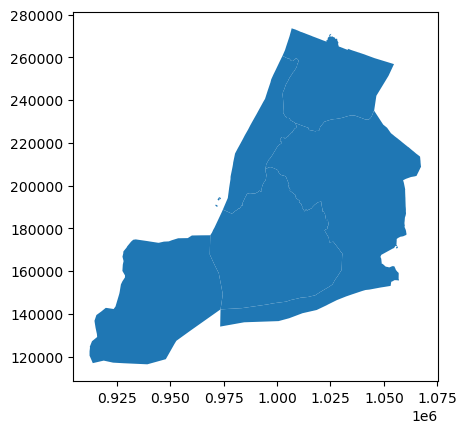

In [6]:
nyd.plot()

<Axes: >

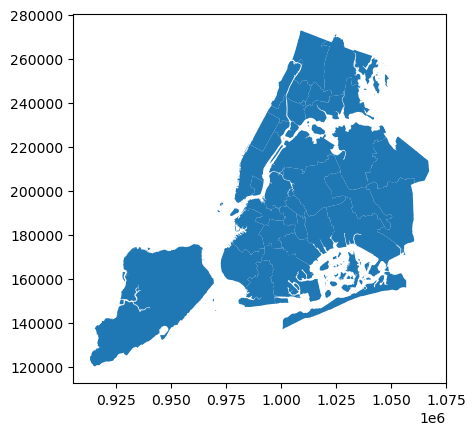

In [7]:
nys.plot()

In [8]:
nyd.crs == nys.crs

True

In [9]:
nyd.sample(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
4,5,Staten Island,212213.139971,2.539686e+09,"POLYGON ((968762.067 175987.749, 968654.251 17..."
2,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."


In [10]:
nys.sample(3)

,SchoolDist,Shape_Leng,Shape_Area,geometry
12,20,94309.167747,2.426967e+08,"POLYGON ((977165.947 176628.617, 977337.528 17..."
15,23,40317.452103,4.740069e+07,"MULTIPOLYGON (((1006065.048 181742.869, 100604..."
9,18,121184.034017,1.751489e+08,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


# Wydzielenie dzielnicy

<Axes: >

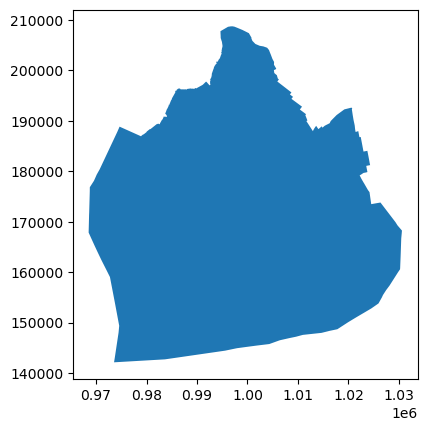

In [11]:
brooklyn = nyd[nyd['BoroName'] == 'Brooklyn']
brooklyn.plot()

In [12]:
nyd['BoroName'] == 'Brooklyn'

0    False
1    False
2     True
3    False
4    False
Name: BoroName, dtype: bool

In [13]:
# iloczyn

In [14]:
area_intersection = gpd.overlay(
    brooklyn, nys, how='intersection', keep_geom_type=False
)

In [15]:
area_intersection

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
0,3,Brooklyn,234928.658563,2.684411e+09,13,86634.820950,1.048708e+08,"POLYGON ((983822.462 191677.056, 983897.776 19..."
1,3,Brooklyn,234928.658563,2.684411e+09,14,95607.545074,1.502956e+08,"POLYGON ((1005307.792 199418.119, 1005557.696 ..."
2,3,Brooklyn,234928.658563,2.684411e+09,15,153453.530575,1.961542e+08,"POLYGON ((978961.111 186932.162, 979000.003 18..."
3,3,Brooklyn,234928.658563,2.684411e+09,16,35848.904082,4.676362e+07,"POLYGON ((1003004.900 192621.499, 1003126.192 ..."
4,3,Brooklyn,234928.658563,2.684411e+09,17,68341.203801,1.284413e+08,"POLYGON ((1006320.818 181792.022, 1006335.500 ..."
5,3,Brooklyn,234928.658563,2.684411e+09,18,121184.034017,1.751489e+08,"MULTIPOLYGON (((1025159.139 156876.210, 102511..."
6,3,Brooklyn,234928.658563,2.684411e+09,19,174238.521299,1.998843e+08,"MULTIPOLYGON (((1030449.177 166513.803, 103044..."
7,3,Brooklyn,234928.658563,2.684411e+09,20,94309.167747,2.426967e+08,"POLYGON ((977337.528 176492.941, 977287.905 17..."
8,3,Brooklyn,234928.658563,2.684411e+09,21,123854.166470,2.101969e+08,"POLYGON ((994966.940 167048.332, 995120.175 16..."
9,3,Brooklyn,234928.658563,2.684411e+09,22,271470.425028,3.856240e+08,"MULTIPOLYGON (((996006.699 173428.335, 996343...."


<Axes: >

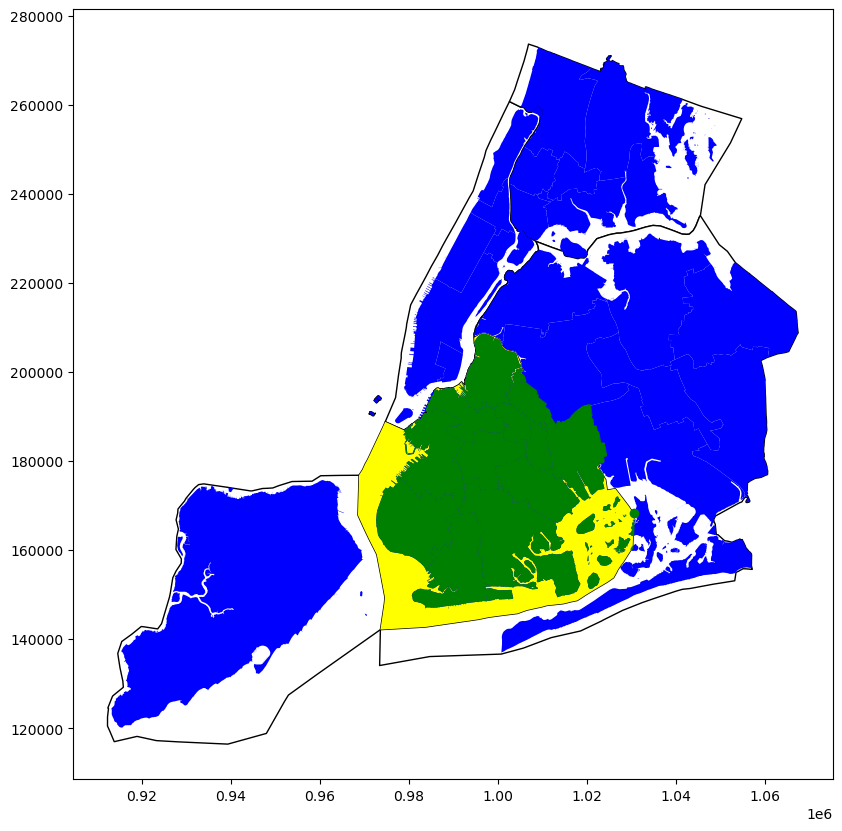

In [19]:
base = nyd.plot(color='white', edgecolor='black', figsize=FS)
brooklyn.plot(ax=base, color='yellow')
nys.plot(ax=base, color='blue')
area_intersection.plot(ax=base, color='green')

<Axes: >

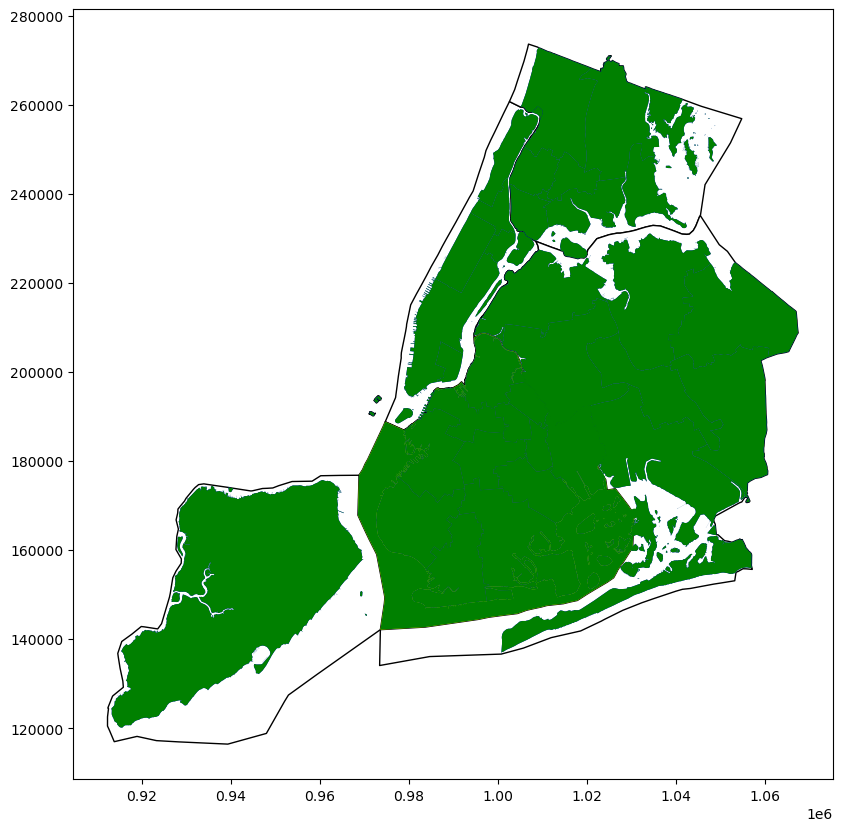

In [20]:
# Union

area_union = gpd.overlay(
    brooklyn, nys, how='union', keep_geom_type=False
)
base = nyd.plot(color='white', edgecolor='black', figsize=FS)
brooklyn.plot(ax=base, color='yellow')
nys.plot(ax=base, color='blue')
area_union.plot(ax=base, color='green')

<Axes: >

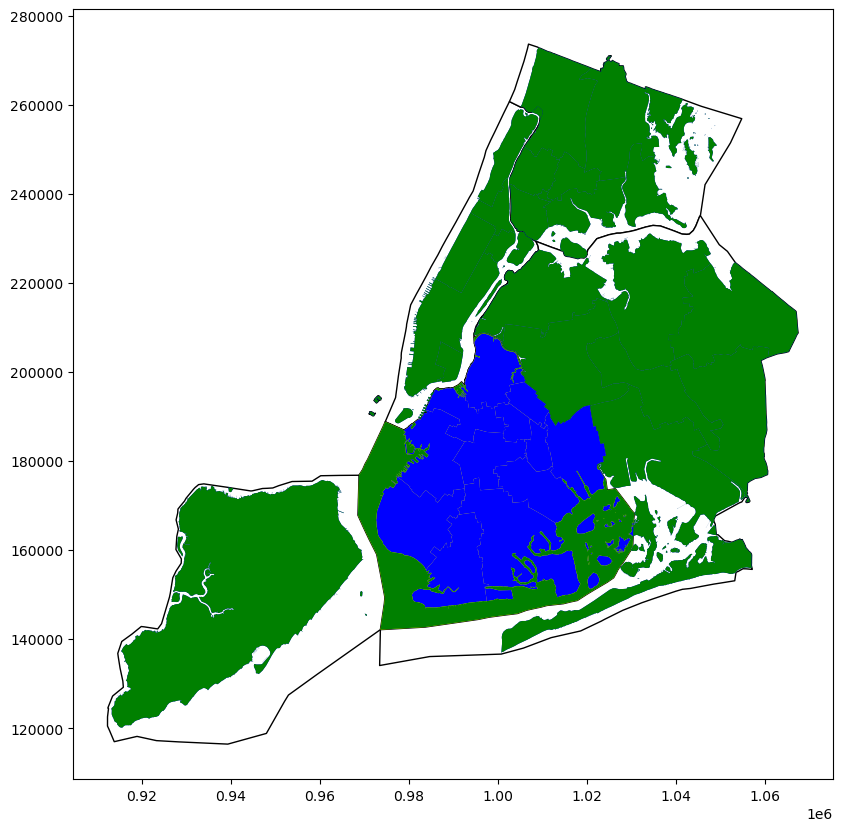

In [24]:
# symmetric difference

area_sym_diff = gpd.overlay(
    brooklyn, nys, how='symmetric_difference', keep_geom_type=False
)
base = nyd.plot(color='white', edgecolor='black', figsize=FS)
brooklyn.plot(ax=base, color='yellow')
nys.plot(ax=base, color='blue')
area_sym_diff.plot(ax=base, color='green')

<Axes: >

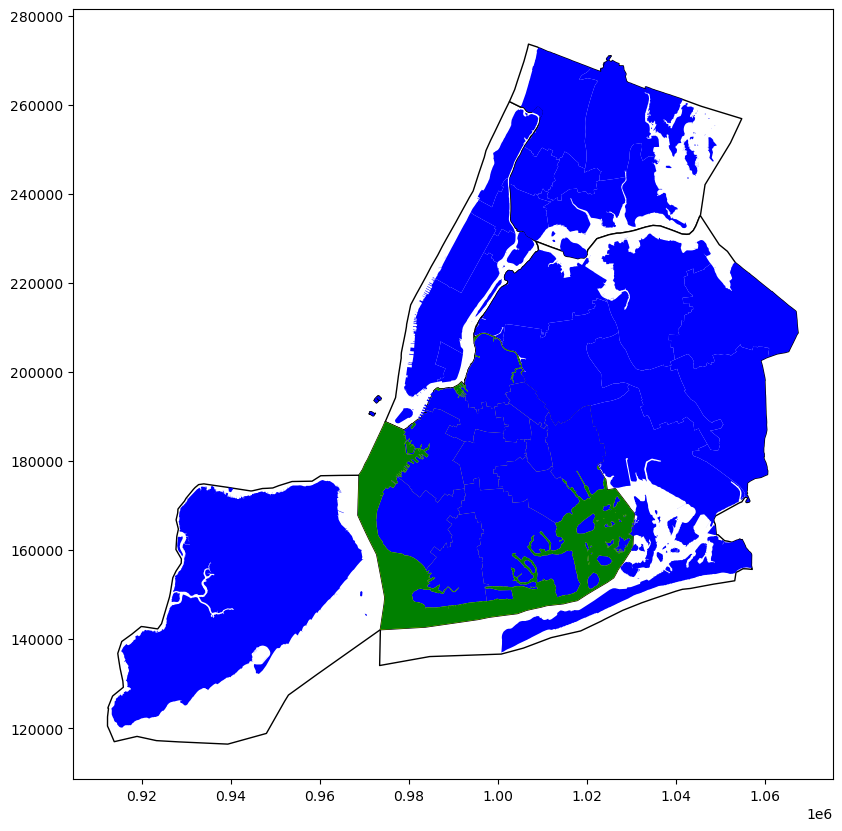

In [25]:
# difference 1

area_diff_b_sd = gpd.overlay(
    brooklyn, nys, how='difference', keep_geom_type=False
)
base = nyd.plot(color='white', edgecolor='black', figsize=FS)
brooklyn.plot(ax=base, color='yellow')
nys.plot(ax=base, color='blue')
area_diff_b_sd.plot(ax=base, color='green')

<Axes: >

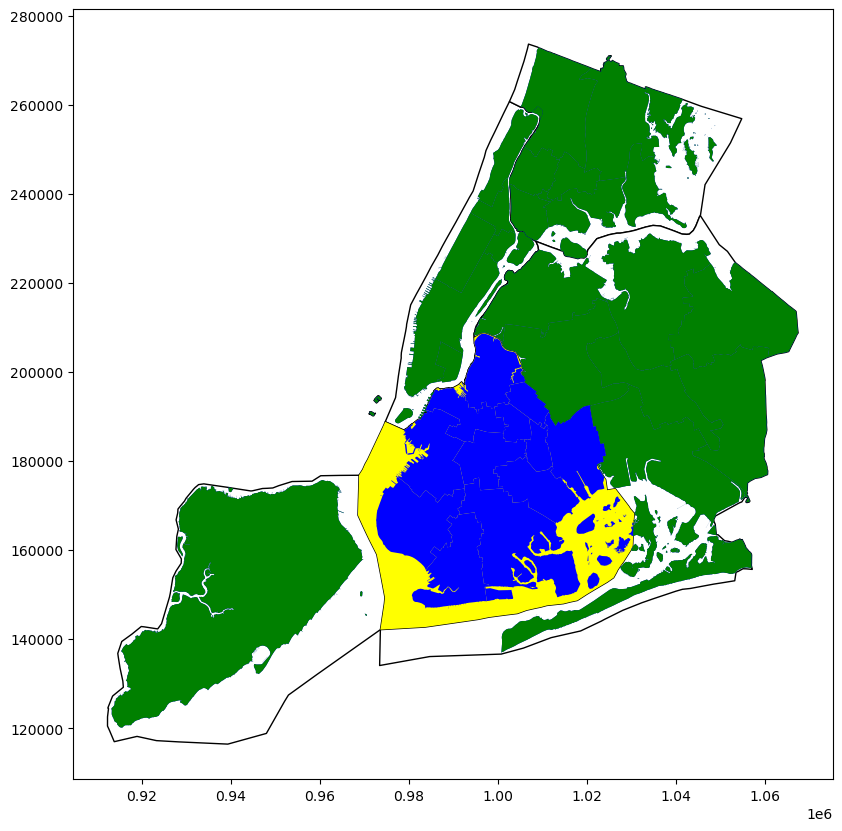

In [26]:
# difference 2

area_diff_sd_b = gpd.overlay(
    nys, brooklyn, how='difference', keep_geom_type=False
)
base = nyd.plot(color='white', edgecolor='black', figsize=FS)
brooklyn.plot(ax=base, color='yellow')
nys.plot(ax=base, color='blue')
area_diff_sd_b.plot(ax=base, color='green')

In [ ]:
# Zadanie

# Symmetric difference : bez używania overlay(..., ..., how='symmetric_difference')